### Summary of survey results and meta data

Meta data includes dimensional data (beach length and surface area), number of partcipants, time to complete the survey (including counting, sorting and data entry) and the weights of platic items, micro-plastics and the total weight.

This notebook aggregates the daily survey results to pieces/meter and 'total pieces' and 'number of different categories' for each survey.

Those values are added to the meta data for each survey. The charts and data that result puts the number and variety of objects identified in the context of time, manpower, surface area and weight.

In [1]:
import numpy as np
import json
import csv
import datetime
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib import colors as mcolors
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from utilities.utility_functions import *
from utilities.style_title_suptitle import *
from utilities.summary_qc_utilities import *
from utilities.simple_x_y_scatter import scatterPlot as x_y_scatter

In [2]:
# index slicing will be used 
idx = pd.IndexSlice

# store the curent working directory
here = os.getcwd()

# name the folders where the output will be sored:
folders = ["data", "charts", "utilities"]

# check for existing and if not make folders
check_for_folders(folders, here)

# make a dictionary to call path by directory name
my_folders = make_folders(folders, here)

# make a project folder to store charts
project_name = "summary_dims_daily_totals/"
project_directory = make_project_folder(my_folders['charts'], project_name)

print(project_directory)

Directory already in place
/home/mwshovel/dev/analyst/survey_qc/survey_qc/charts/summary_dims_daily_totals/


In [3]:
# Read the JSON data in from local
waterbody_groups = json_file_get('/home/mwshovel/dev/analyst/survey_qc/survey_qc/data/waterbody_groups.json')

In [4]:
help(get_one_day_survey_details)

Help on function get_one_day_survey_details in module utilities.summary_qc_utilities:

get_one_day_survey_details(location='', date='', data='')
    Returns the total quantity, pieces/meter and number of categories for
    for one survey. Uses a dataframe from the API endpoint:
    'https://mwshovel.pythonanywhere.com/api/surveys/daily-totals/code-totals/'.
    
    This functions assumes the following column names: 'location', 'date','code','pcs_m' and 'quantity'.



In [5]:
# transform the the waterbody groups from an array to a python dictionary
water_body_names = {x['location']:x['beaches'] for x in waterbody_groups}

# Read in the .csv data
survey_results = pd.read_csv('/home/mwshovel/dev/analyst/survey_qc/survey_qc/data/survey_results.csv')
dims_df = pd.read_csv('/home/mwshovel/dev/analyst/survey_qc/survey_qc/data/dims_data.csv')

# make a timestamp column from the JSON string date
survey_results['py_date'] = pd.to_datetime(survey_results['date'])

# add key the daily survey results to the daily dimensional data
add_survey_summary(survey_results, dims_df)

dims_df['pcs_m_2'] = dims_df['quantity']/dims_df['area']
dims_df['py_date'] = pd.to_datetime(dims_df.date)

In [6]:
# these columns from the dims_df will be the index for a summary DF 
summary_survey_index = [
    'length',
    'area',
    'quantity',
    'time_minutes',
    'total_w',
    'mac_plast_w',
    'mic_plas_w',
    'pcs_m',
    'pcs_m_2'  
]

# these are the values for each variable that need to be reported
summary_survey_columns = [
    'min',
    'max',
    'average',
    'median'
]

# these should be the same as summary_survey_index
columns_of_interest = [
    'length',
    'area',
    'quantity',
    'time_minutes',
    'total_w',
    'mac_plast_w',
    'mic_plas_w',
    'pcs_m',
    'pcs_m_2'  
]


In [7]:
survey_data_summary = add_data_to_report_summary(dims_df, summary_survey_index, summary_survey_columns, columns_of_interest)
df_names = {
    'all_summary_data.csv':dims_df,
    'survey_data_summary.csv':survey_data_summary,
}
files_to_csv(df_names, my_folders['data'])

In [8]:
dims_df

,survey_key,date,length,area,mac_plast_w,mic_plas_w,total_w,est_weight,num_parts_staff,num_parts_other,time_minutes,participants,project,is_2020,location,variety,pcs_m,quantity,pcs_m_2,py_date
0,bielersee_vinelz_fankhausers2020-04-2712,2020-04-27,12,24.0,200.0,0.010,0.220,0.0,1,0,115,"[""HD""]",2020,True,bielersee_vinelz_fankhausers,25.0,10.47,126.0,5.250000,2020-04-27
1,gasi-strand2020-04-2438,2020-04-24,38,119.0,200.0,0.000,0.220,0.0,1,0,105,"[""HD""]",2020,True,gasi-strand,15.0,0.93,34.0,0.285714,2020-04-24
2,plage-de-cheyres2020-03-1599,2020-03-15,99,198.0,50.0,0.001,0.400,0.0,1,0,120,"[""HD""]",2020,True,plage-de-cheyres,15.0,0.60,60.0,0.303030,2020-03-15
3,plage-de-cheyres2020-04-1786,2020-04-17,86,395.0,60.0,0.001,0.340,0.0,1,0,210,"[""HD""]",2020,True,plage-de-cheyres,18.0,0.82,73.0,0.184810,2020-04-17
4,rastplatz-stampf2020-04-2430,2020-04-24,30,25.0,160.0,0.001,0.160,0.0,1,0,90,"[""HD""]",2020,True,rastplatz-stampf,17.0,1.50,45.0,1.800000,2020-04-24
5,strandbeiz2020-03-2048,2020-03-20,48,110.0,90.0,0.031,0.100,0.0,1,0,180,"[""HD""]",2020,True,strandbeiz,25.0,1.87,91.0,0.827273,2020-03-20
6,thunersee_spiez_meierd_12020-03-0865,2020-03-08,65,325.0,50.0,0.001,1.300,0.0,1,0,120,"[""HD""]",2020,True,thunersee_spiez_meierd_1,9.0,0.71,45.0,0.138462,2020-03-08
7,thunersee_spiez_meierd_12020-04-0960,2020-04-09,60,175.8,50.0,0.002,0.200,0.0,1,0,180,"[""HD""]",2020,True,thunersee_spiez_meierd_1,16.0,0.86,50.0,0.284414,2020-04-09
8,walensee_walenstadt_wysse2020-03-1753,2020-03-17,53,563.0,150.0,0.025,0.175,0.0,1,0,200,"[""HD""]",2020,True,walensee_walenstadt_wysse,33.0,3.87,204.0,0.362345,2020-03-17
9,walensee_walenstadt_wysse2020-04-2154,2020-04-21,54,277.0,450.0,0.100,0.600,0.0,1,0,150,"[""HD""]",2020,True,walensee_walenstadt_wysse,31.0,4.82,258.0,0.931408,2020-04-21


In [34]:
# assign variables

# the figure title:
water_body = ""

point_size = 120
x ='time_minutes'
y = 'length'
z = 'pcs_m'
z_is_true = False

# define the date range
# if you want all data leave as is or supple the start and end dates and remove comment from
# the method 'start_end_date' and comment the 'date_range = 'All' statement
start_date = '2020-04-01'
end_date = '2020-04-23'
# date_range = start_end_date(start_date,end_date, "%Y-%m-%d") 
date_range = 'All'

# dates for the figure title if you are using 'All' make sure the max date has the current month and year
min_date = "Jan-2020"
max_date = "Apr-2020"

# put the xaxis value first
file_name = '{}-{}-length-time'.format(min_date, max_date)

# legend and title contents
chart_title = 'Time to complete a survey and length of shore line.'
figure_title = 'All locations and all surveys {} to {}'.format(min_date, max_date)
legend_title = 'Location'

# Axis labels
y_axis = axis_label_props(label='Length of shore line')

x_axis = axis_label_props(label='Time in minutes to complete survey')

# provide the border color for the points
edge_color = 'white'


# choose wether to use a tight layout or not:
tight_layout = False

# get the relevant data

In [35]:
# define the style and position for the chart title and the figure title
title_style = title_styles(fs=12,
                           ff='sans-serif',
                           fw='normal',
                           color='black',
                          )

sup_title_style = title_styles(fs=14,
                               ff='sans-serif',
                               fw='roman',
                               color='black'
                              )

the_title_position = title_position(pad=15,
                                    loc='left',
                                   )

sup_title_position = the_sup_title_position(x=0.13,
                                            va='baseline',
                                            ha='left',
                                            y=0.98
                                           )

# set the title and figure title
the_title = title_content(label=chart_title)

the_sup_title=title_content(label=figure_title)

# set the legend style and the location of the bounding box
the_legend_style = legend_style(title=legend_title)

# set the legend title and alignment
legend_title = legend_t_align()

# adjust the distance from the top of the chart to the plotting area
subplot_params = adjust_subplot_params()

# file save paramteters
save_this = file_params(project_directory, file_name, ['.svg','.jpeg'])

kwargs = {
     "min_date":min_date,
     "max_date":max_date,
     "a_df":dims_df,
     "x":x,
     "y":y,
     "z":z,
     "date_range":date_range,
     "title_style":title_style,
     "the_title_position":the_title_position,
     "the_title":the_title,
     "sup_title_style":sup_title_style,
     "sup_title_position":sup_title_position,
     "the_sup_title":the_sup_title,
     "point_size":point_size,
     "edge_c":edge_color,
     "the_legend_style":the_legend_style,
     "legend_title":legend_title,
     "y_axis":y_axis,
     "x_axis":x_axis,
     "subplot_params":subplot_params,
     "save_this":save_this,
     "tight_layout":tight_layout
 }

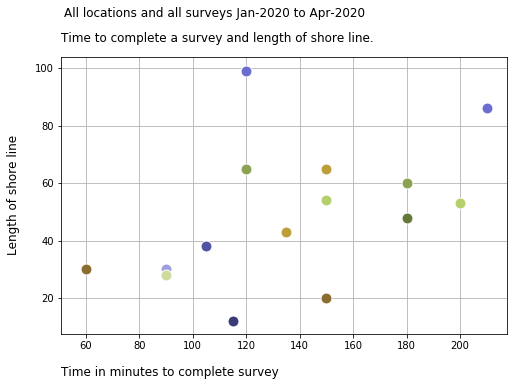

In [36]:
x_y_scatter(**kwargs)